    n            Experimental_Result(ns)    Theoretical_Result{log2(n)}          Adjusted_Theoretical_Result(ns)
   1,000,000            7,084,899             19.931568569324174                           9,223,634
  13,250,000           78,774,900             23.659489023887375                          52,381,636
  25,500,000          177,467,499              24.60399391129567                         201,385,973
  37,750,000          279,779,200             25.169973308649254                         317,421,060
  50,000,000          450,173,700             25.575424759098897                         412,867,895

Scaling constant C ≈ 1.02500


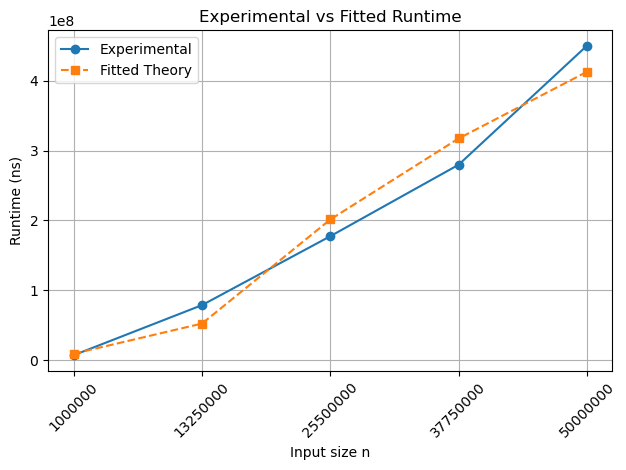

In [5]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt

# Input size (n) is chosen in a way that the selected values can represent the growth rate accurately for logarithmic time complexity
N_vals=[1_000_000, 13_250_000, 25_500_000, 37_750_000, 50_000_000]

# The given pseudocode of the question is in the function for checking the time complexity
def nested_loop(n):  
    j = 5
    a = [1]*(n+1)
    b = [1]*(n+1)
    total = 0
    while j < n/2:
        k = 5
        while k < n:
            total += a[int(j)] * b[int(k)]
            k *= math.sqrt(2)
        j *= math.sqrt(3)
    return total

# Time stamps to get the runtime of the function to obtain the experimental time complexity
exp_ns = []
for n in N_vals:
    t0 = time.perf_counter()            # time stamp noted at the start of the function
    nested_loop(n)
    t1 = time.perf_counter()            # time stamp noted at the end of the function
    exp_ns.append((t1 - t0) * 10**9)    # time calculated in nanoseconds

# Finding the best-fit curve to fit O(log^2 n) curve to the experimental data
log_n = np.log2(N_vals)
a, b, c = np.polyfit(log_n, exp_ns, 2)
fit_ns = a*log_n**2 + b*log_n + c

# Calculation of the scaling constant
scaled_theory = fit_ns
C = np.mean(np.array(exp_ns) / np.array(fit_ns))

# The Experimental Analysis Table
print(f"{'n':>5} {'Experimental_Result(ns)':>34} {'Theoretical_Result{log2(n)}':>30} {'Adjusted_Theoretical_Result(ns)':>40}")
print("="*130)
for n, exp, log_val, theo in zip(N_vals, exp_ns, log_n, scaled_theory):
    print(f"{n:12,} {int(exp):20,} {log_val:30} {int(theo):35,}")

print(f"\nScaling constant C ≈ {C:.5f}")

# The Graph
plt.plot(N_vals, exp_ns, 'o-', label='Experimental')
plt.plot(N_vals, fit_ns, 's--', label='Fitted Theory')

# To set the x-axis values exactly to the N_vals
plt.xticks(N_vals, [f'{n:}' for n in N_vals], rotation=45)

plt.xlabel('Input size n')
plt.ylabel('Runtime (ns)')
plt.title('Experimental vs Fitted Runtime')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
